<a href="https://colab.research.google.com/github/matthias-k/computational_physics_2024/blob/master/01_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# we are going to classify a popular breast cancer dataset
data, target = datasets.load_breast_cancer(return_X_y=True)

In [3]:
# data is a matrix of shape (569, 30)
# the first number refers to the number of cases or samples while the second
# number refers to the number of features from which we try to predict
# breast cancer
# 
# please see the documentation @ https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
# for more details
data.shape

(569, 30)

In [4]:
# target is a binary vector of size (569,) in which each entry is the label of
# each case, either malignant (0) or benign (1).
target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [18]:
# for simplicity we cut the number of features from 30 to just two features
data = data[:, :2]
data.shape

(569, 2)

In [6]:
# Excercise 1.1
# Try to find a linear classifier by hand that can classify the dataset 
# as good as possible. Let the classification rule be w1 * f1 + w2 * f2 + w3 > 0.5
# where w1, w2 and w3 are the weights to be learnt and f1, f2 are the features.
# What accuracy can you reach?      

In [19]:
def classifier_score(data, w): # returns score needed for classification
    """given data=(569, 2) and weights=(3) returns (569) array of classifier scores
    """
    w1 = w[:(len(w)-1)]
    w2 = w[len(w)-1]
    return data.dot(w1) + w2 

#example weights
w = np.array([0.01,0.02,-0.5])
score = classifier_score(data,w)

print(classifier_score(data,w).shape) # returns 

def accuracy(scores, targets):  # grades the predicted results
    return np.mean((scores>0.5)==targets)

print(accuracy(score, target)) # returns accuracy for exemple weights as a test 


(569,)
0.37258347978910367


In [ ]:
# Execise 1.1a (optional but helpful)
# create a 2d scatter plot with all data points and visualize the model
# predictions, e.g. by coloring them with matplotlib's `fill` method

0.8927943760984183


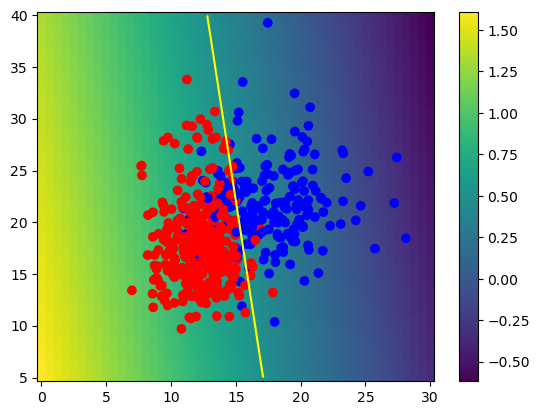

In [21]:
# plots a heatmap for a 2D dataset
# ensure that data shape is (569, 2)

def plot_grid(data, targets, weights):
        # heatmap
    xs = np.linspace(0, 30)
    ys = np.linspace(5, 40)
    XS, YS = np.meshgrid(xs, ys)
    grid_data = np.array([XS.flatten(), YS.flatten()]).T
    
    heatmap_scores = classifier_score(grid_data, weights)
    
    plt.pcolormesh(XS, YS, heatmap_scores.reshape(XS.shape))
    plt.colorbar()
    plt.contour(XS, YS, heatmap_scores.reshape(XS.shape), levels=[0.5], colors=['yellow'])


    # data points
    colors = ['blue' if target == 0 else 'red' for target in targets]
    plt.scatter(data[:, 0], data[:, 1], c=colors)
    
    

w = np.array([-0.0649,-0.008,1.65])
plot_grid(data,target,w)
print(accuracy(classifier_score(data,w), target))

In [9]:

# Excercise 1.2
# Learn the optimal parameters automatically using gradient descent. For the
# loss function use a simple squared loss (t - tp)**2 where t is the target
# label (either 0 or 1) and tp = w1 * f1 + w2 * f2 + w3 is the predicted label.
# What accuracy can you reach? Why is this loss function problematic? Do you
# have ideas for a a better alternative?

In [22]:
w = np.array([-0.0649,-0.008,1.65]) # can be used to resets weights after unsuccessful gradient descent
score = classifier_score(data,w)

In [72]:
def mean_squared_error(scores, targets):
    return np.dot(scores-targets,scores-targets)/len(w)

# this cell manually updates the weights since usually a few steps suffice

def update_w(w, scores, targets, alpha=0.0002):
    
    grad_w1 = np.dot(data.T, scores - targets) / len(targets)
    grad_w2 = np.mean(scores - targets)
    
    w[:(len(w)-1)] -= alpha * grad_w1
    
    w[len(w)-1] -= alpha * grad_w2

score = classifier_score(data,w)

mean_squared_error(score, target)
print('old weights')
print(w)
update_w(w, score, target)
print('new weights')
print(w)
print('accuracy =', accuracy(score, target))

old weights
[-0.06495382 -0.00670991  1.65027758]
new weights
[-0.0649664  -0.00670068  1.65028242]
accuracy = 0.8769771528998243


In [12]:
# Excercise 1.2a (optional)
# use all 30 dimensions instead of only 2. Can you get better accuracy?

In [73]:
data, target = datasets.load_breast_cancer(return_X_y=True) # ensures that entire data set is used now

In [74]:
# essentially the same code as before can be used for the 30 dimensional problem
def classifier_score(data, w):
    """given data=(569, 30) and weights=(31) returns (569) array of classifier scores
    """
    w1 = w[:(len(w)-1)]
    w2 = w[len(w)-1]
    return data.dot(w1) + w2 


def accuracy(scores, targets):
    return np.mean((scores>0.5)==targets)


def mean_squared_error(scores, targets):
    return np.dot(scores-targets,scores-targets)/len(w)



def update_w(w, scores, targets, alpha=0.0002):
    
    grad_w1 = np.dot(data.T, scores - targets) / len(targets)
    grad_w2 = np.mean(scores - targets)
    
    w[:(len(w)-1)] -= alpha * grad_w1
    
    w[len(w)-1] -= alpha * grad_w2

In [91]:
w = [-0.0649,-0.008,]
for n in range(30-len(w)): # resets weights to zero
    w.append(0.0)
w.append(1.65)

score = classifier_score(data,w)

In [92]:
def update_w(w, scores, targets, alpha=0.00000001): #updates weights
    
    grad_w1 = np.dot(data.T, scores - targets) / len(targets)
    grad_w2 = np.mean(scores - targets)
    
    w[:(len(w)-1)] -= alpha * grad_w1
    
    w[len(w)-1] -= alpha * grad_w2

target_accuracy = 0.905
for n in range(5000): # number of iterations
    score = classifier_score(data,w)
    mean_squared_error(score, target)
    
    update_w(w, score, target)
    
    if accuracy(score, target) >= target_accuracy : # iterating this function long enough can, at some point,  
        print('target reached')         # shoot past its highest accuracy and then settle at a lower accuracy. 
        print(accuracy(score, target))  # Using target accuracy, the loop will stop after it surpasses its target
        break
print('weights =')
print(w)
print('accuracy =',accuracy(score, target))

target reached
0.9050966608084359
weights =
[-0.06487882724103698, -0.00796697035940408, 0.0001257285305530854, 0.0003398769930178614, 1.6399859763272724e-07, -8.437512488574177e-08, -3.1463117148190057e-07, -1.436287500702284e-07, 3.155037631835384e-07, 1.3636643617251857e-07, -6.004859550696863e-08, 2.866845156667931e-06, -4.0730374276739636e-07, -3.118919492450601e-05, 1.4659070870296729e-08, -1.0822978630303603e-09, -1.1295963188370741e-08, 3.1174076735421822e-09, 4.2556854153528e-08, 4.247053323604516e-09, 1.644196335930861e-05, 3.529853022843675e-05, 9.339751277268503e-05, -0.0002811411882025274, 1.7132291227573353e-07, -5.056760380325539e-07, -8.785425505748126e-07, -2.3495578213579217e-07, 3.244654376767272e-07, 9.827958428184414e-08, 1.6500025102678992]
accuracy = 0.9050966608084359
